In [1]:
! pip install -r ../requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 148.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 116.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 117.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 28.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 158.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 128.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 180.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 150.7 MB/s eta 0:00:0000:0100:01
     ━━━━━

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

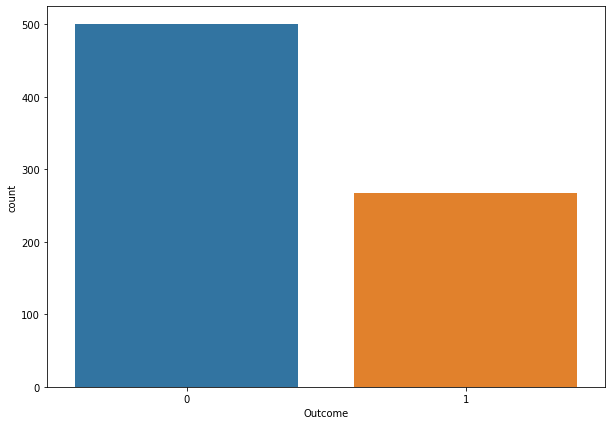

In [4]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='Outcome')

We have unbalanced samples of outcomes in our dataset, we will need to make a resample in order to use a decision tree model

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From inspecting the dataset and evaluating the general information, we can see 6 of our numeric features where their minimum value is 0 (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI), in the case of Pregnancies, it makes sense, but for the rest of them, we needed we investigated and concluded that these values are not possible.

In [6]:
#Converting the 0 values of the numerical features we investigated, to the average of the column that shared the same outcome value. 
def replaceZeros(x,col_name,average_positive_outcome,average_negative_outcome):
    if(x[col_name] == 0):
        if(x["Outcome"] == 0):
            return average_negative_outcome
        elif(x["Outcome"] == 1):
            return average_positive_outcome
    else:
        return x[col_name]

df["Glucose"] = df.apply(lambda x: replaceZeros(x,"Glucose",df[df["Outcome"] == 1]["Glucose"].mean(),df[df["Outcome"] == 0]["Glucose"].mean()),axis=1)
df["BloodPressure"] = df.apply(lambda x: replaceZeros(x,"BloodPressure",df[df["Outcome"] == 1]["BloodPressure"].mean(),df[df["Outcome"] == 0]["BloodPressure"].mean()),axis=1)
df["SkinThickness"] = df.apply(lambda x: replaceZeros(x,"SkinThickness",df[df["Outcome"] == 1]["SkinThickness"].mean(),df[df["Outcome"] == 0]["SkinThickness"].mean()),axis=1)
df["Insulin"] = df.apply(lambda x: replaceZeros(x,"Insulin",df[df["Outcome"] == 1]["Insulin"].mean(),df[df["Outcome"] == 0]["Insulin"].mean()),axis=1)
df["BMI"] = df.apply(lambda x: replaceZeros(x,"BMI",df[df["Outcome"] == 1]["BMI"].mean(),df[df["Outcome"] == 0]["BMI"].mean()),axis=1)


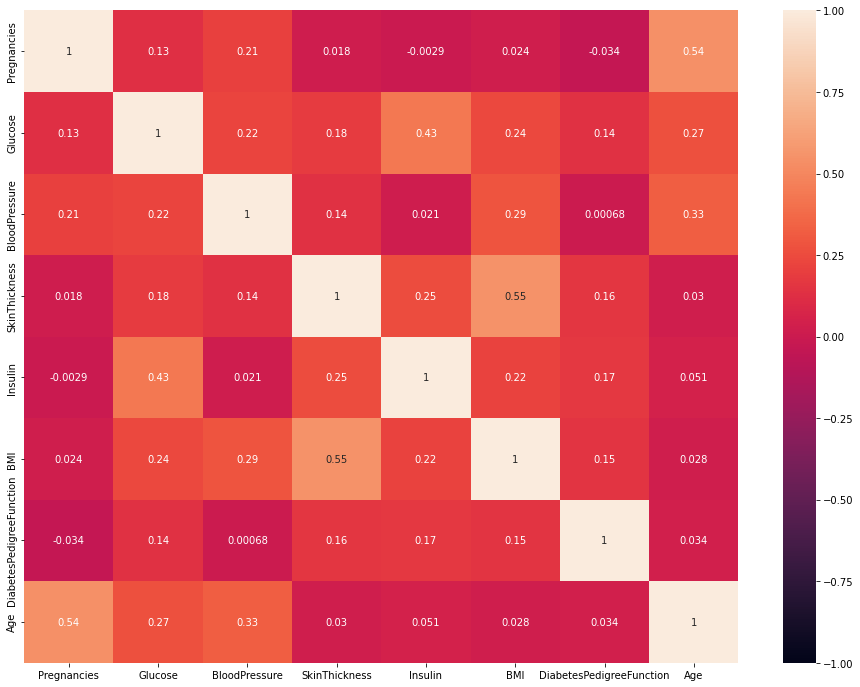

In [7]:
# Correlation between independet features
plt.figure(figsize=(16, 12))
sns.heatmap(df.drop(columns=["Outcome"],axis=1).corr(), annot=True,vmin=-1,vmax=1)
plt.show()

In [8]:
#Correlation between independent features and the target
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.495906
BloodPressure               0.168405
SkinThickness               0.213398
Insulin                     0.258666
BMI                         0.315760
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [9]:
# Since our target was unbalanced, we need to upscale the results were the Outcome == 1 in order to use the Decision Tree algorithm
df_majority = df[(df["Outcome"]==0)]
df_minority = df[(df["Outcome"]==1)]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=400,random_state=42)
df = pd.concat([df_minority_upsampled,df_majority])
df["Outcome"].value_counts()

0    500
1    400
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

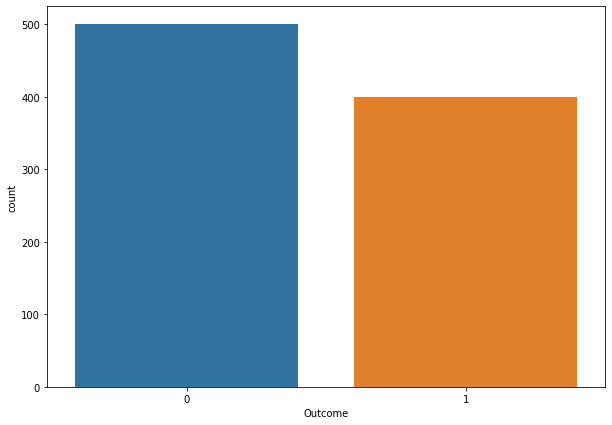

In [10]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='Outcome')

In [11]:
df.to_csv('../data/processed/df_data.csv')

# Saving processed data

## Decision tree (criterion = gini)

In [12]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [14]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
print(f"Socre of our train: {clf.score(X_train,y_train)}")
print(f"Socre of our test: {clf.score(X_test, y_test)}")


Socre of our train: 1.0
Socre of our test: 0.9066666666666666


[[110  11]
 [ 10  94]]


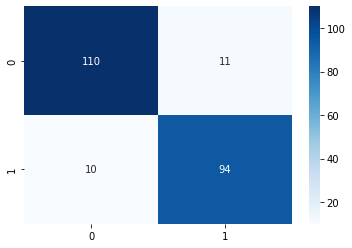

In [16]:
print(confusion_matrix(y_test,clf.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)), annot=True,fmt="d",cmap="Blues")
plt.show()

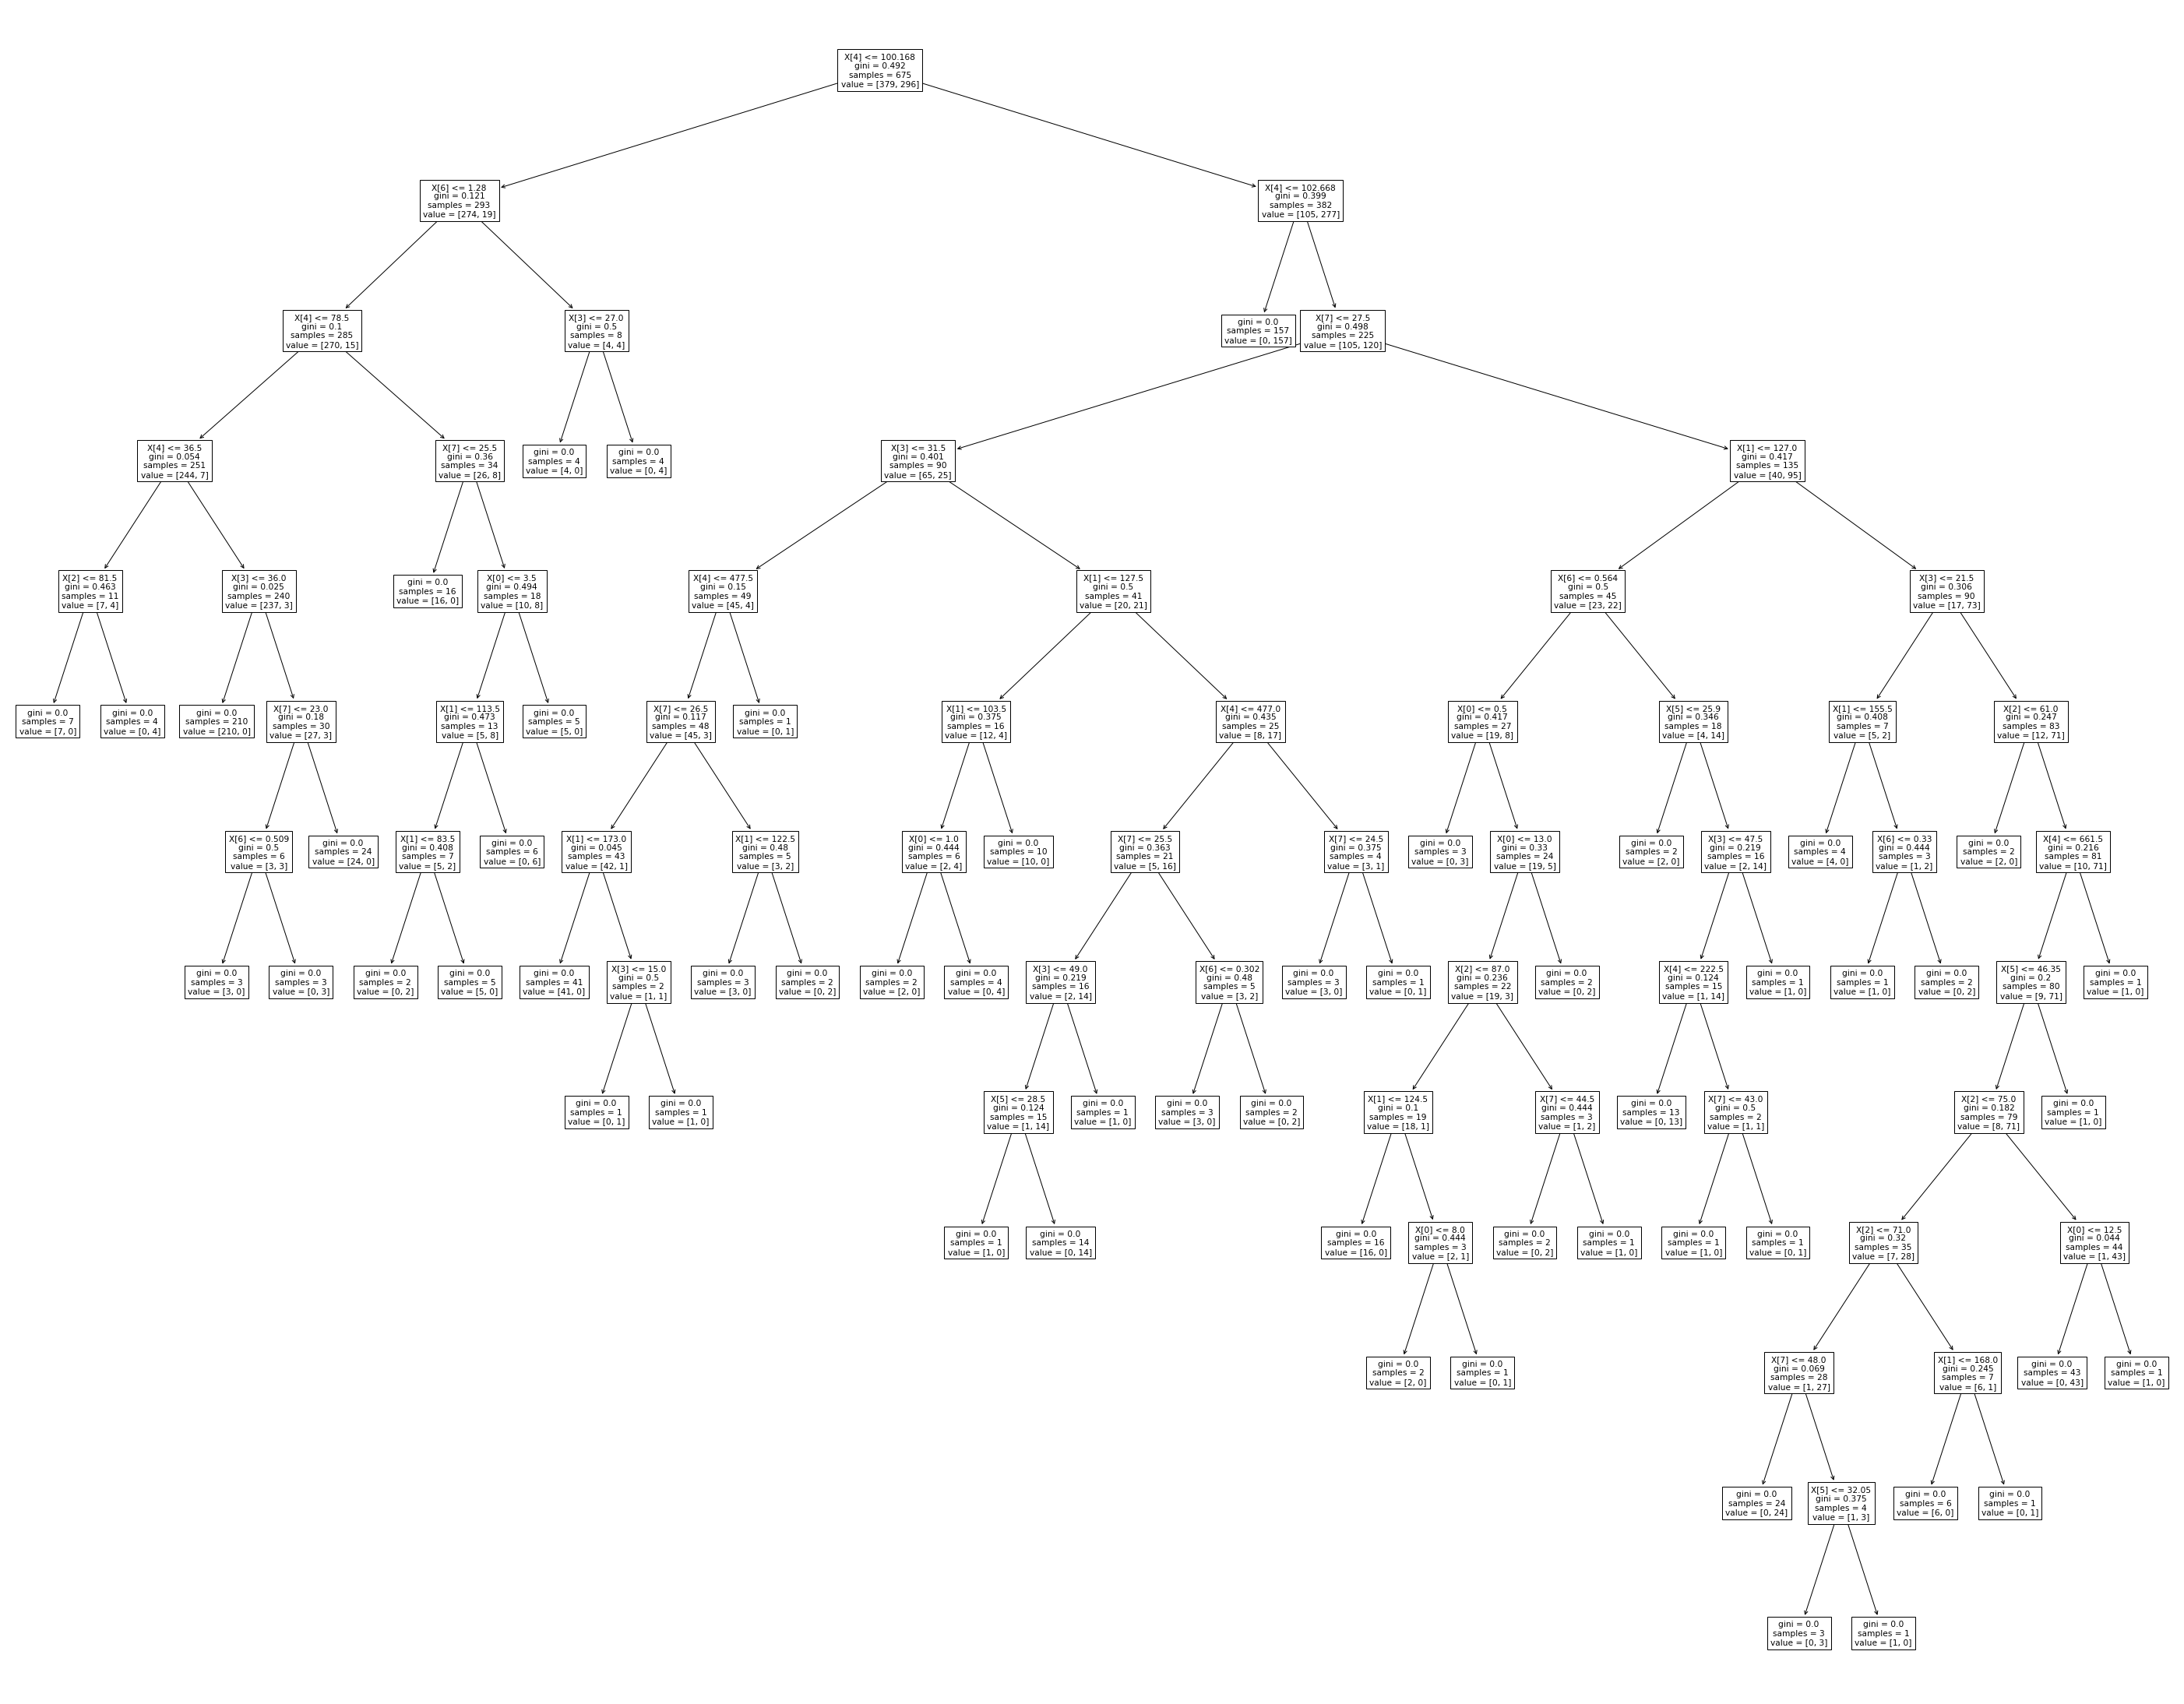

In [17]:
plt.figure(figsize=(50,40))
tree.plot_tree(clf)
plt.show()

## Desision Tree (criterion = entropy)

In [18]:
clf_entropy = DecisionTreeClassifier(random_state=42,criterion="entropy")
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
print(f"Socre of our train: {clf_entropy.score(X_train,y_train)}")
print(f"Socre of our test: {clf_entropy.score(X_test, y_test)}")

Socre of our train: 1.0
Socre of our test: 0.92


[[111  10]
 [  8  96]]


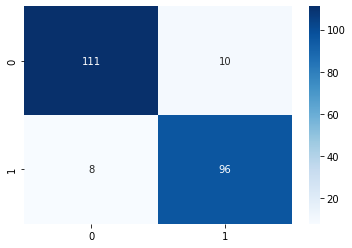

In [20]:
print(confusion_matrix(y_test,clf_entropy.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,clf_entropy.predict(X_test)), annot=True,fmt="d",cmap="Blues")
plt.show()

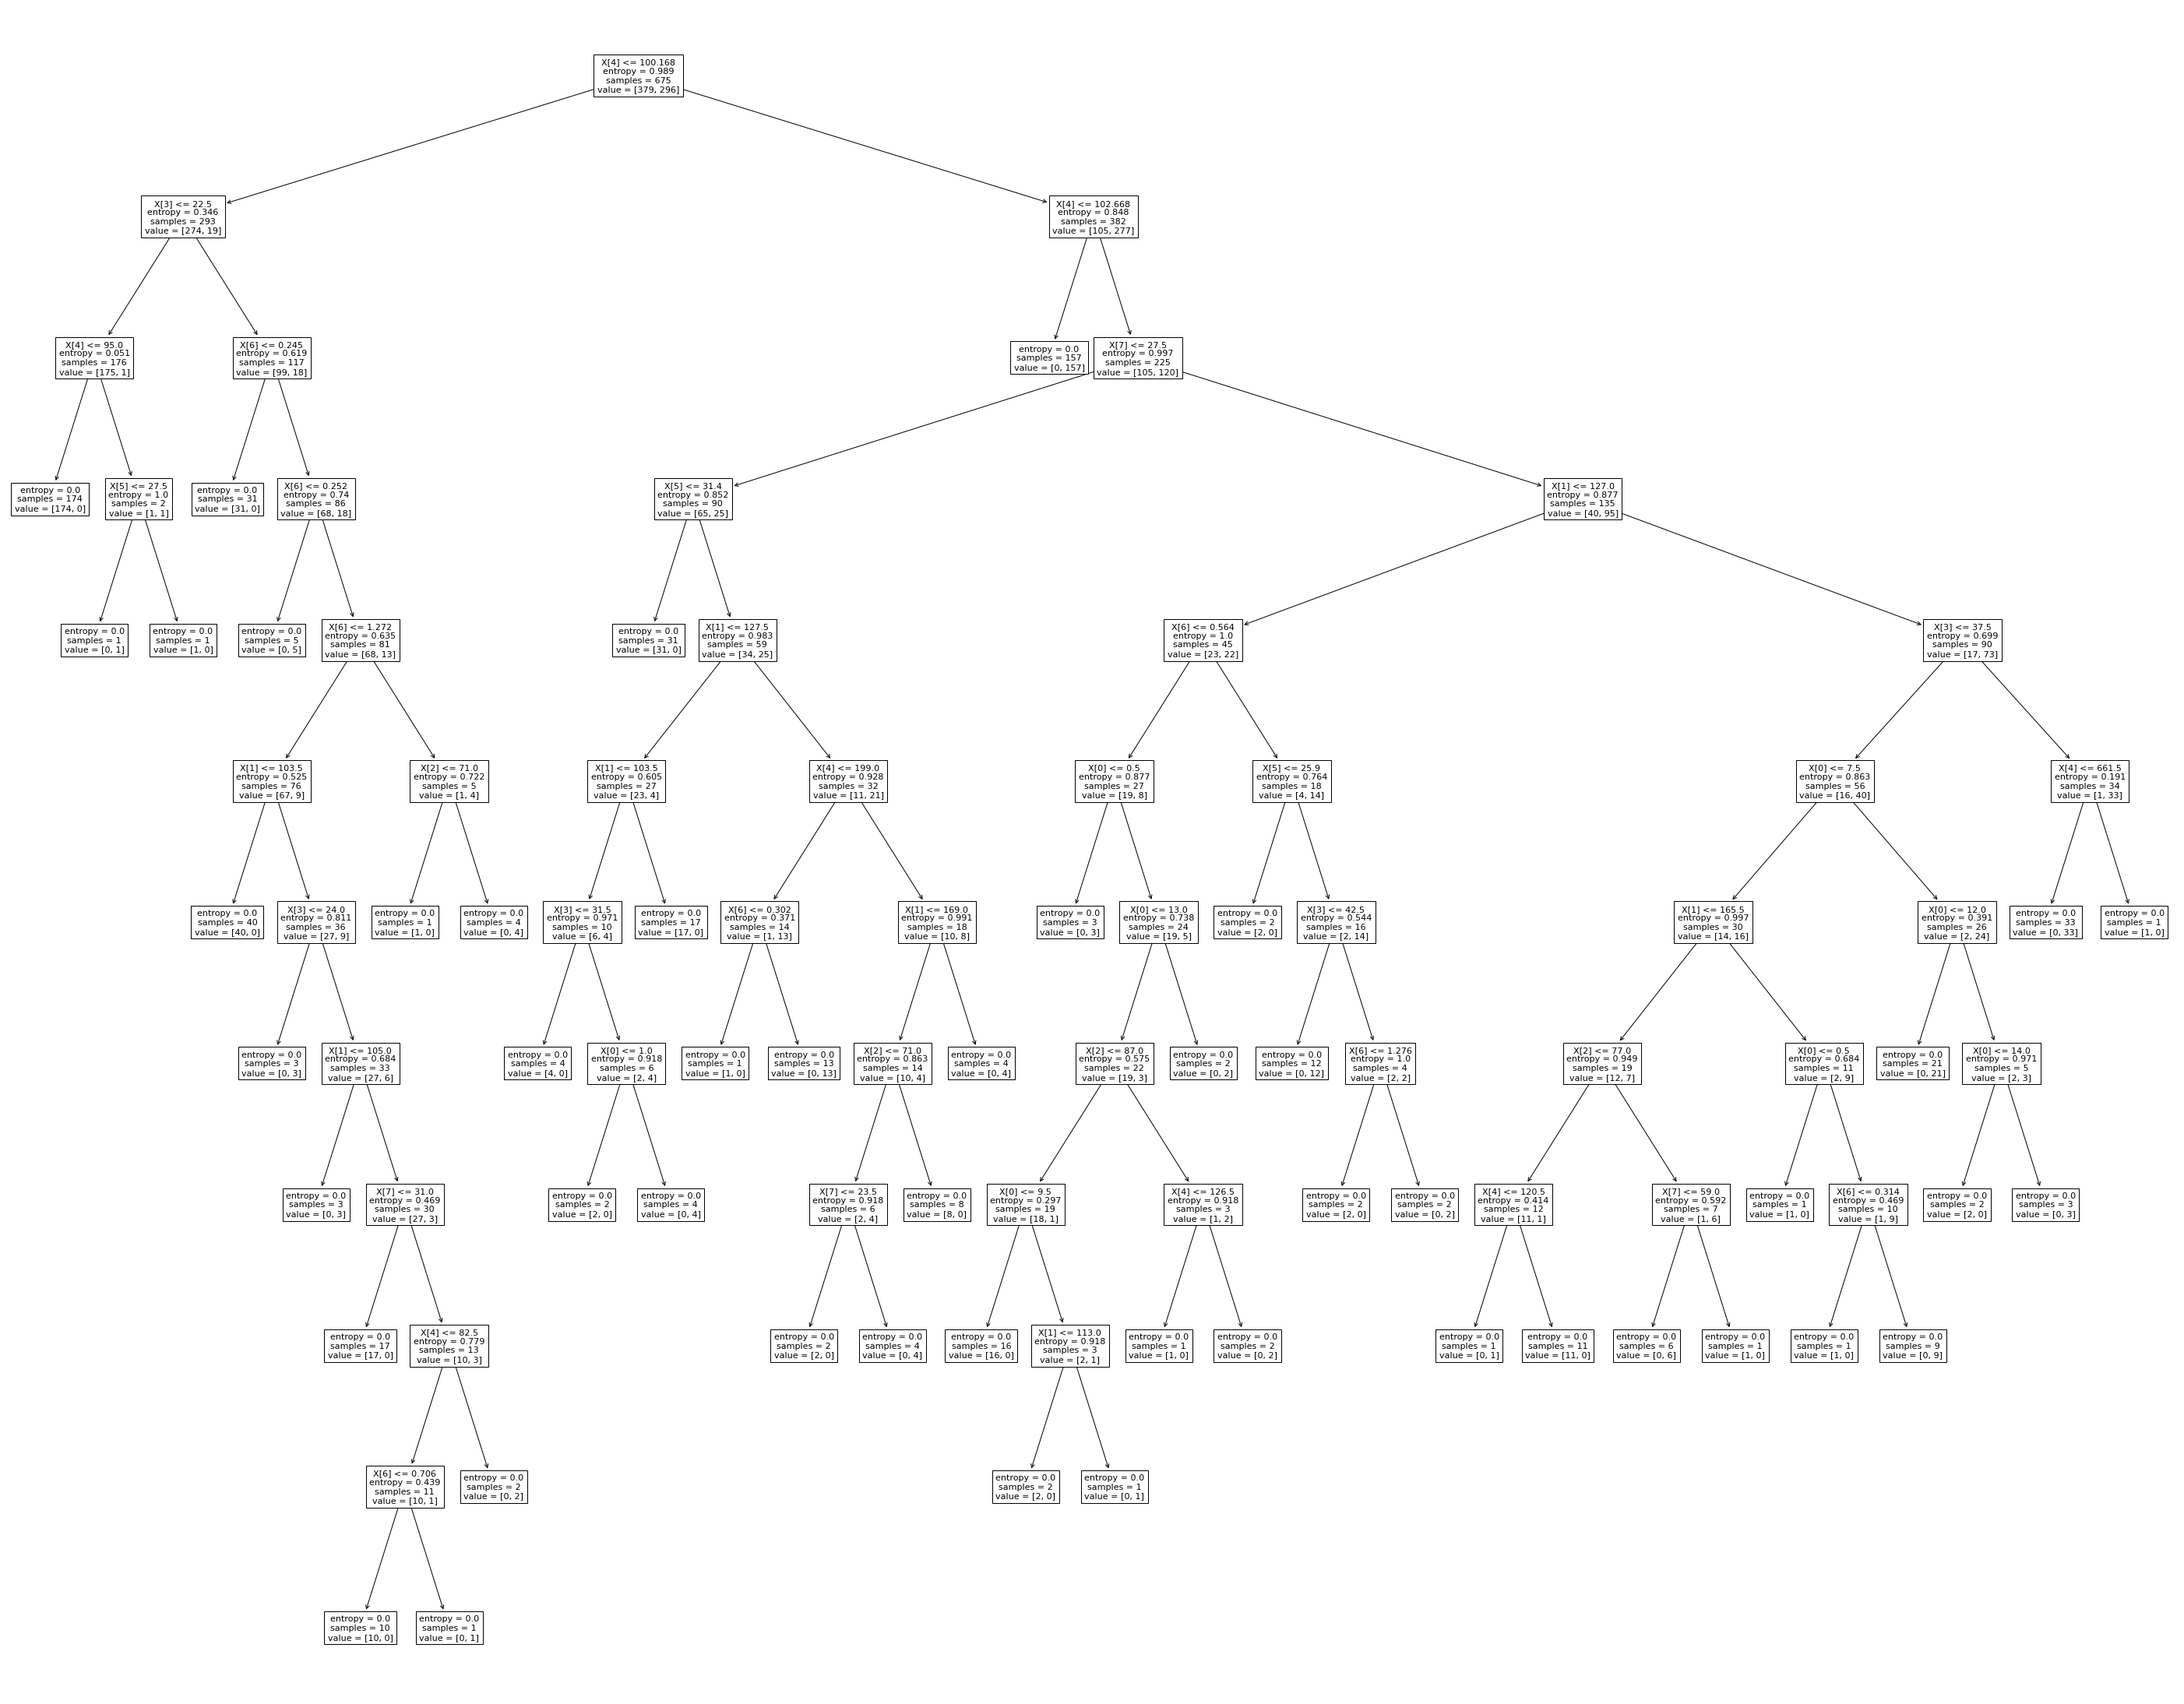

In [21]:
plt.figure(figsize=(50,40))
tree.plot_tree(clf_entropy)
plt.show()

#### As we can see, our decision tree performance is really good, but let's see if there is room for improvement

## Hypertuning

In [22]:
parameters = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':range(1,200,2),'min_samples_split': [2, 3, 4]}

clf_cv = GridSearchCV(DecisionTreeClassifier(), parameters)


In [23]:
clf_cv.fit(X_train,y_train)
print(clf_cv.best_params_)
print(clf_cv.best_score_)
print(clf_cv.best_estimator_)

{'criterion': 'gini', 'max_depth': 39, 'min_samples_split': 2, 'splitter': 'best'}
0.9288888888888888
DecisionTreeClassifier(max_depth=39)


In [24]:
clf_tunned = clf_cv.best_estimator_
clf_tunned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=39)

In [25]:
print(f"Accuracy (train): {accuracy_score(y_train,clf_tunned.predict(X_train))}")
print(f"Accuracy (test): {accuracy_score(y_test,clf_tunned.predict(X_test))}")



Accuracy (train): 1.0
Accuracy (test): 0.9111111111111111


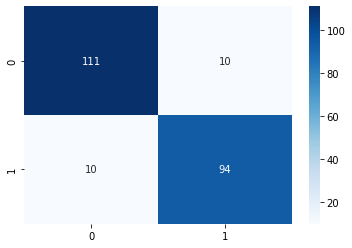

In [26]:
sns.heatmap(confusion_matrix(y_test,clf_tunned.predict(X_test)), annot=True,fmt="d",cmap="Blues")
plt.show()

By hypertuning our parameters we went from ~0.906 accuracy to 0.92 without sacrificing our performance on the training dataset

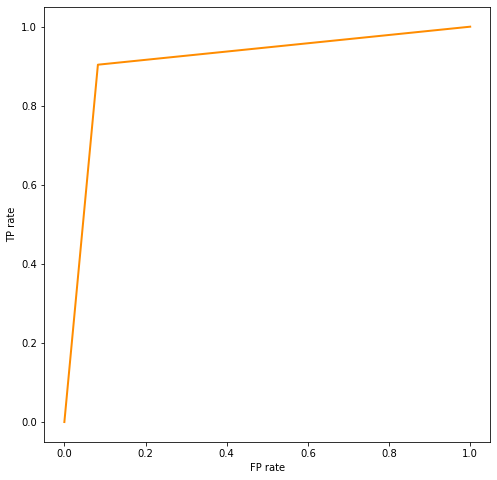

Computed Area Under the Curve (AUC) 0.9106007628734901


In [27]:
fpr,tpr, thresholds = roc_curve(y_test,clf_tunned.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision Tree- Model")
plt.xlabel("FP rate")
plt.ylabel("TP rate")
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

#### As a last check, we see that the ROC Curve of our model is well above the identity line, the same shape we see in well-performing classification algorithms, on low False Positive rates => highest possible True Positive rates